In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
covid = pd.read_csv("Covid-19.xls")
covid.head()

#covid[covid.Country_code].drop()
covid.drop('Country_code',
  axis='columns', inplace=True)
covid.head()



,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0


In [3]:
c = covid.iloc[:,1].sample(3) #sample three countries randomly then i called that list c so that i can letter reffer to it. 
c 

44501        Fiji
63235     Ireland
79231    Malaysia
Name: Country, dtype: object

In [4]:
 #Calculate and display the sum, the average of the cumulative cases of each WHO region.
covid.groupby('WHO_region').agg([np.sum, np.mean])['Cumulative_cases']

#Calculate and display sum, the average of the cumulative deaths of each WHO region.
covid.groupby('WHO_region').agg([np.sum, np.mean])['Cumulative_deaths' ]

b = covid[(covid.Country== c.iloc[0])|(covid.Country == c.iloc[1])|(covid.Country == c.iloc[2])]
b

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
44170,2020-01-03,Fiji,WPRO,0,0,0,0
44171,2020-01-04,Fiji,WPRO,0,0,0,0
44172,2020-01-05,Fiji,WPRO,0,0,0,0
44173,2020-01-06,Fiji,WPRO,0,0,0,0
44174,2020-01-07,Fiji,WPRO,0,0,0,0
...,...,...,...,...,...,...,...
79501,2021-09-20,Malaysia,WPRO,14954,2097830,376,23443
79502,2021-09-21,Malaysia,WPRO,14345,2112175,301,23744
79503,2021-09-22,Malaysia,WPRO,15759,2127934,334,24078
79504,2021-09-23,Malaysia,WPRO,14990,2142924,487,24565


#### Visualization

### Boxplot 

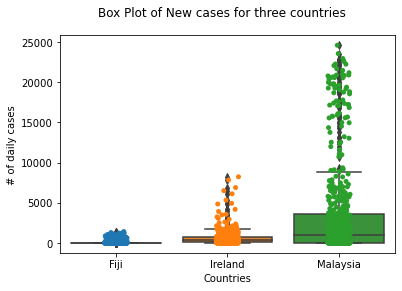

In [5]:
sns.boxplot(x=b["Country"],y=b["New_cases"])
sns.stripplot(x=b['Country'], y=b['New_cases'])
plt.suptitle("Box Plot of New cases for three countries")
plt.xlabel("Countries")
plt.ylabel("# of daily cases");

### Barplot

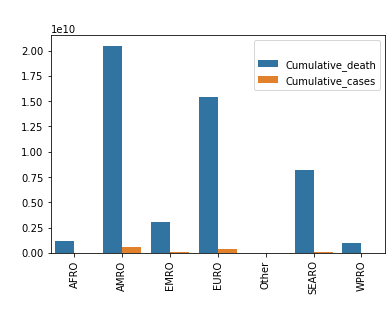

In [6]:
a = covid.groupby('WHO_region').agg([np.sum])['Cumulative_deaths']
c = covid.groupby('WHO_region').agg([np.sum])['Cumulative_cases']
a = a.reset_index()
c = c.reset_index()
c[" "] = ["Cumulative_death" for i in range(7)]
a[" "] = ["Cumulative_cases" for i in range(7)]

lst = [c,a]
newdata = pd.concat(lst)
newdata
sns.barplot(x="WHO_region",hue=" ",y="sum", data=newdata )
plt.suptitle(" ")
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(rotation=90);


## Lineplot

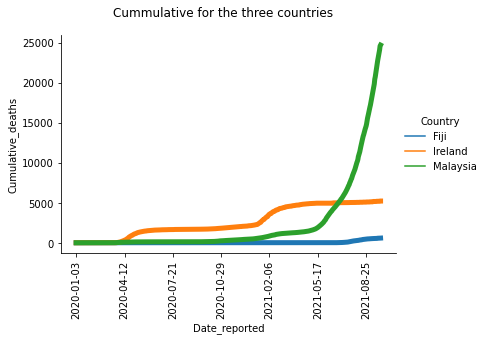

In [7]:
plt.xticks(np.arange(0,1900,100),rotation=90)
sns.lineplot(x="Date_reported",hue="Country",y="Cumulative_deaths",linewidth=5,data=b)
plt.suptitle('Cummulative for the three countries')
sns.despine()
plt.legend(loc=6,frameon=False,bbox_to_anchor=(1, 0.5),
           title='Country');